In [676]:
#Import require Dependencies/liabraries


#Fo Data manipulation
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for pre-processing of data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

#For outlier,skewness removal
from scipy.stats import zscore,skew,boxcox
from sklearn.preprocessing import PowerTransformer

#Evolution Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score



#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Ensemble techniques
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [584]:
#read Train_dataset from .CSV file
df_train = pd.read_csv('training_set.csv')

#read Test_dataset from .CSV file
df_test = pd.read_csv('test_set.csv')

# EDA

In [585]:
#Describing train_data set
df_train.describe(include = "all")

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [586]:
pd.set_option('display.max_columns', df_train.columns.size)

In [587]:
#Dropping column 'Unnamed: 0'.
df_train = df_train.drop(columns=['Unnamed: 0'])
df_train.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [588]:
#Describing test_data set
df_test.describe(include = "all")

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.00000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,345.000000,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,0.054255,0.473893,0.092894,0.066671,0.052938,0.261577,0.141491,0.180391,1.668669,0.095181,0.761708,0.172634,0.103357,0.089001,0.457352,0.258119,0.824935,0.122200,0.09097,0.089146,0.058495,0.049797,0.113907,0.050246,0.088423,0.115687,0.148119,0.011722,0.069247,0.063459,0.036353,0.093618,0.037554,0.063401,0.233734,0.163763,0.001997,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,199.618803,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,0.193042,0.770257,0.287302,0.460284,0.278251,0.962487,0.443760,0.556946,1.860817,0.799695,1.146614,1.206941,0.374469,0.438095,1.259678,0.854455,3.617189,0.495914,0.50045,0.409787,0.368296,0.364195,0.647490,0.364229,0.406143,0.442055,0.497177,0.249035,0.491256,0.367637,0.267692,0.536883,0.177095,0.407094,0.637226,0.690451,0.031495,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,172.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.220000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,517.500000,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.700000,0.000000,0.000000,0.000000,0.085000,0.000000,0.000000,2.660000,0.000000,1.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.189000,0.000000,0.307500

In [589]:
#Dropping column 'Unnamed: 0'.
df_test = df_test.drop(columns=['Unnamed: 0'])
df_test.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [590]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [591]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      691 non-null    float64
 1   X2      691 non-null    float64
 2   X3      691 non-null    float64
 3   X4      691 non-null    float64
 4   X5      691 non-null    float64
 5   X6      691 non-null    float64
 6   X7      691 non-null    float64
 7   X8      691 non-null    float64
 8   X9      691 non-null    float64
 9   X10     691 non-null    float64
 10  X11     691 non-null    float64
 11  X12     691 non-null    float64
 12  X13     691 non-null    float64
 13  X14     691 non-null    float64
 14  X15     691 non-null    float64
 15  X16     691 non-null    float64
 16  X17     691 non-null    float64
 17  X18     691 non-null    float64
 18  X19     691 non-null    float64
 19  X20     691 non-null    float64
 20  X21     691 non-null    float64
 21  X22     691 non-null    float64
 22  X2

Total Dataset contain 3910 Rows and 57 columns in which last column Y is our dependant variable 

There is no null value is present in any column of given Datasets train as well as test.

In both datasets last 2 columns which are ['X56', 'X57'] having data type int64 where rest of columns are having Dtype float64.

In [592]:
#IN train_data Converting d-Type from int64 to float64

df_train['X56']=df_train['X56'].astype('float64')
df_train['X57']=df_train['X57'].astype('float64')

#IN test_data Converting d-Type from int64 to float64

df_test['X56']=df_test['X56'].astype('float64')
df_test['X57']=df_test['X57'].astype('float64')

In [593]:
#Find Duplicate in train
df_train.duplicated().sum()

296

In [594]:
#Find Duplicate in test
df_test.duplicated().sum()

30

In [595]:
#Drop Duplicate from both train and test
df_train = df_train.drop_duplicates()

df_test = df_test.drop_duplicates()

In [596]:
#Shape of datasets after dropping duplicates
print(f"Shape of Train_Data after dropping Duplicate: {df_train.shape}")
print(f"Shape of Test_Data after dropping Duplicate: {df_test.shape}")

Shape of Train_Data after dropping Duplicate: (3614, 58)
Shape of Test_Data after dropping Duplicate: (661, 57)


In [597]:
#Nature of columns ('Contenious' OR 'Categorical')
df_train.nunique()

X1      136
X2      160
X3      207
X4       37
X5      241
X6      138
X7      162
X8      161
X9      138
X10     235
X11     111
X12     306
X13     149
X14     124
X15     109
X16     242
X17     189
X18     220
X19     561
X20     138
X21     393
X22      80
X23     158
X24     138
X25     379
X26     264
X27     229
X28     183
X29     149
X30     172
X31     121
X32      98
X33     164
X34     101
X35     171
X36     152
X37     178
X38      51
X39     158
X40     120
X41      92
X42     174
X43     128
X44     147
X45     228
X46     210
X47      37
X48     100
X49     294
X50     608
X51     216
X52     894
X53     478
X54     281
X55    1950
X56     256
X57     852
Y         2
dtype: int64

In [598]:
#Nature of columns ('Contenious' OR 'Categorical')
df_test.nunique()

X1      74
X2      73
X3     126
X4       8
X5     142
X6      72
X7      80
X8      72
X9      65
X10    110
X11     52
X12    167
X13     73
X14     42
X15     41
X16    110
X17     82
X18     95
X19    295
X20     43
X21    204
X22     27
X23     69
X24     65
X25    126
X26     91
X27     73
X28     64
X29     46
X30     54
X31     35
X32     25
X33     50
X34     26
X35     53
X36     68
X37     86
X38     10
X39     40
X40     44
X41     22
X42     45
X43     44
X44     37
X45    118
X46     72
X47      8
X48     28
X49     97
X50    259
X51     59
X52    290
X53    163
X54     86
X55    516
X56    132
X57    355
dtype: int64

Except Dependant Variable(Y) all other(Independant Variables) are continuous in nature.

We also check again the distribution of datsets by plotting graph.

X1
5.663903822452426


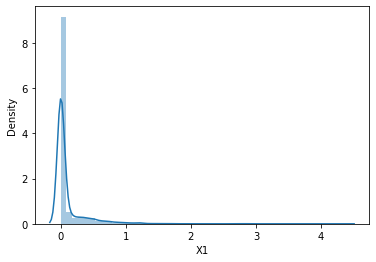

X2
14.086282835818686


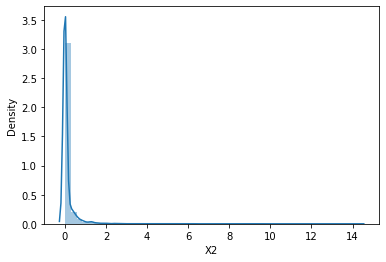

X3
2.901875122206119


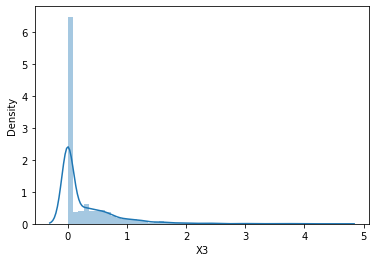

X4
26.459602787009693


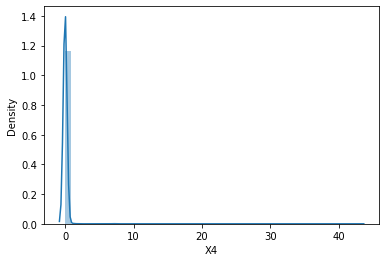

X5
4.284558867065693


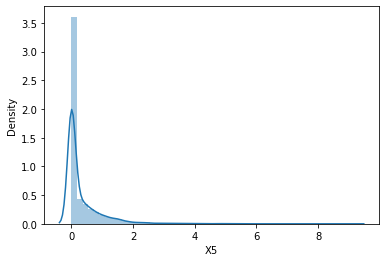

X6
4.626756742916926


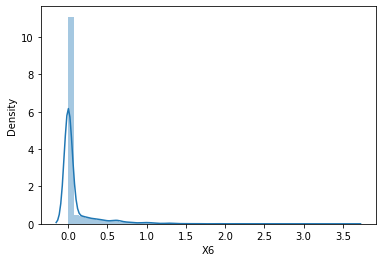

X7
6.956642084604626


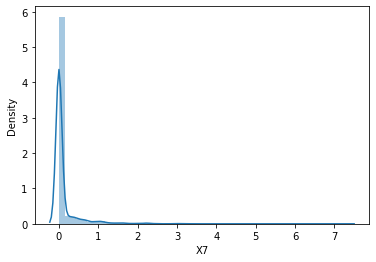

X8
10.102441081236472


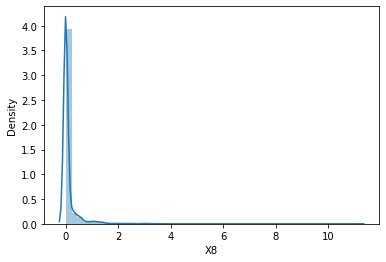

X9
4.170171311846735


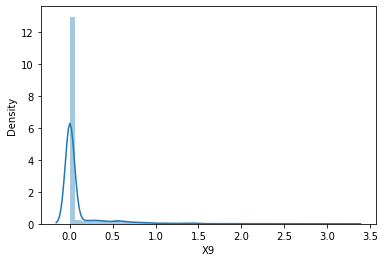

X10
8.804140170495526


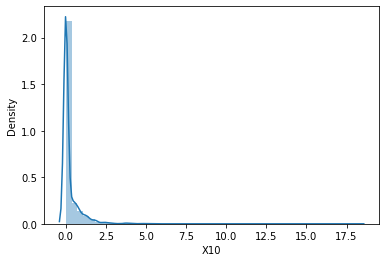

X11
5.059651528088558


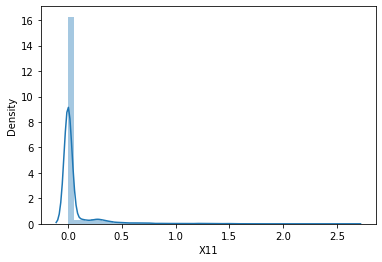

X12
2.828167761770394


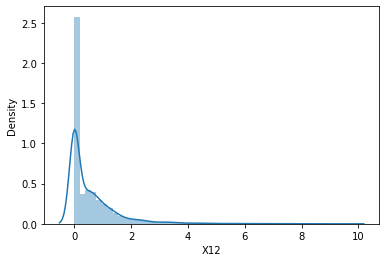

X13
7.169503566713065


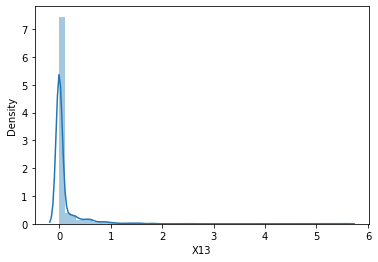

X14
8.4847723157653


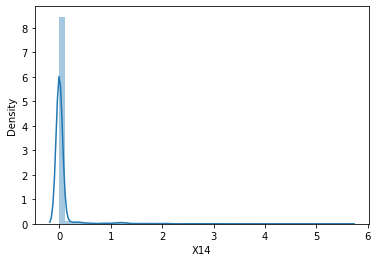

X15
7.592131372302533


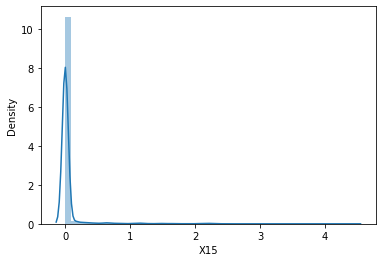

X16
8.894184612236817


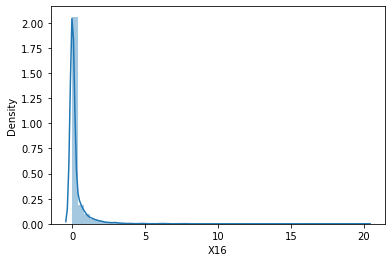

X17
5.562323427661466


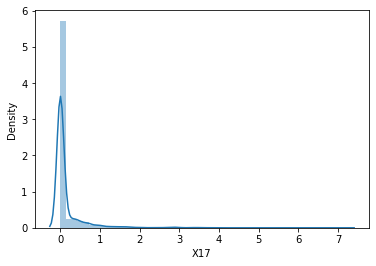

X18
4.91449573472436


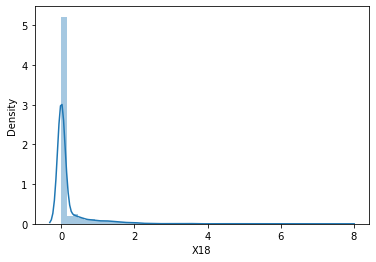

X19
1.5811551413576328


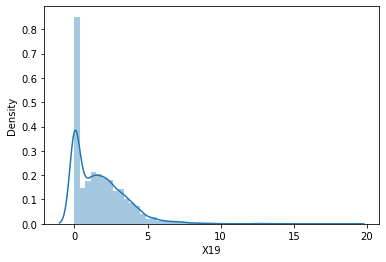

X20
7.584123176589924


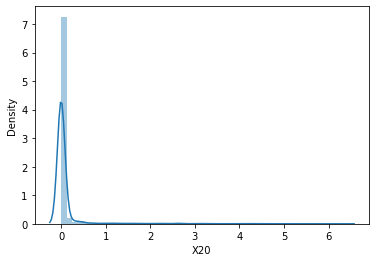

X21
2.285679228686081


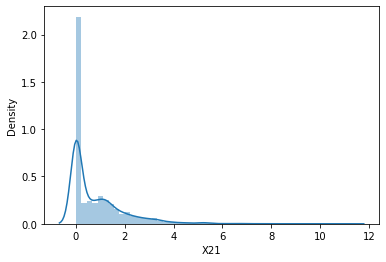

X22
10.005435664754478


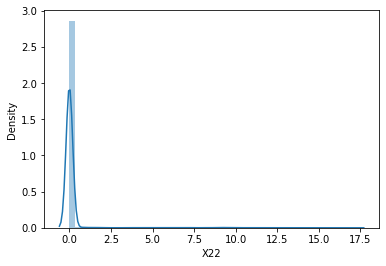

X23
5.89346403411104


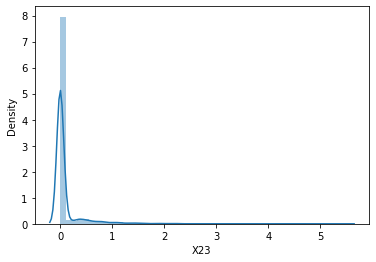

X24
15.85473765559293


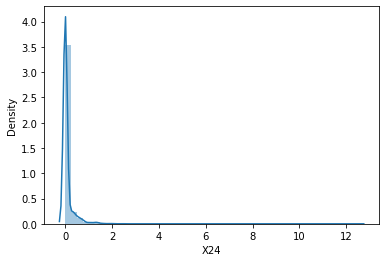

X25
5.605986339934611


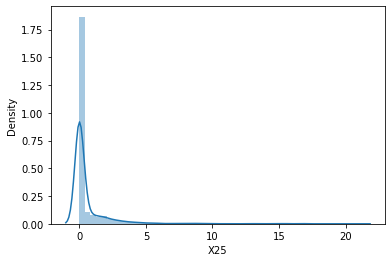

X26
6.411611135044929


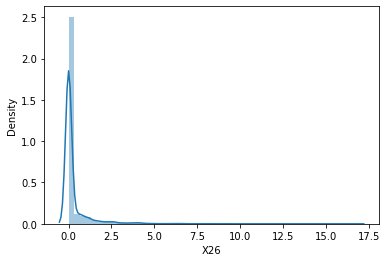

X27
9.323589605003118


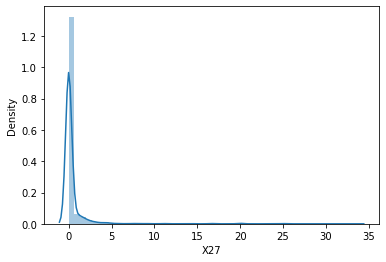

X28
6.5658417738296215


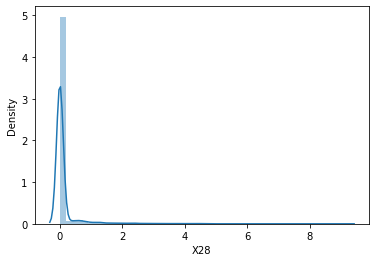

X29
11.594594080972005


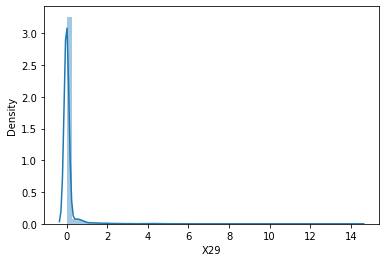

X30
6.292103002596209


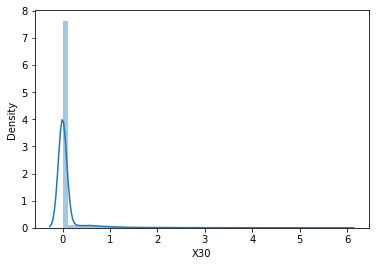

X31
13.176164228984652


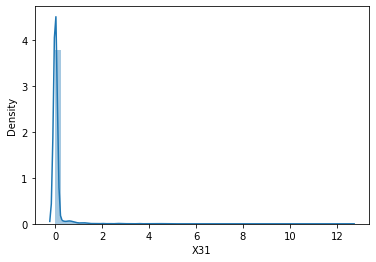

X32
10.301719015510734


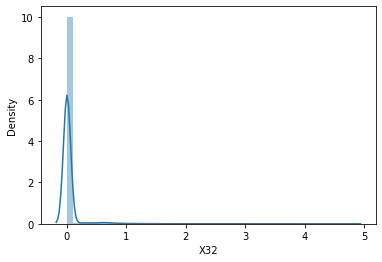

X33
14.424985673290854


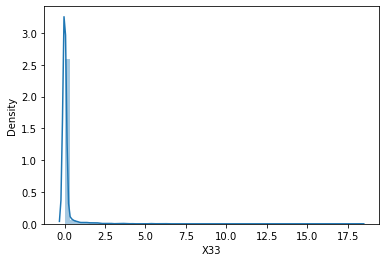

X34
10.20492162776365


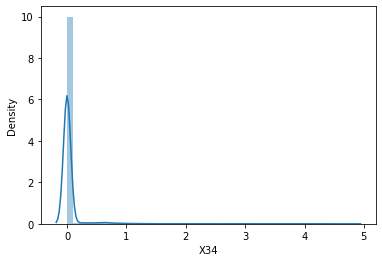

X35
15.642929686391641


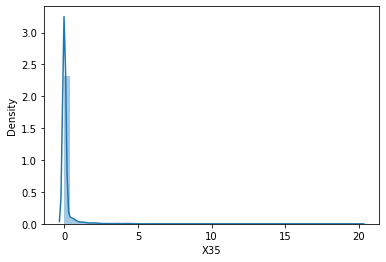

X36
7.675321769678835


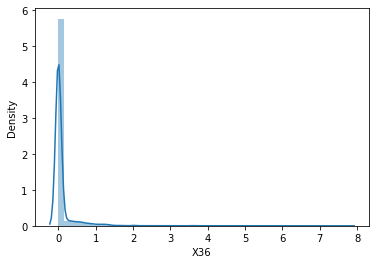

X37
4.649630460767885


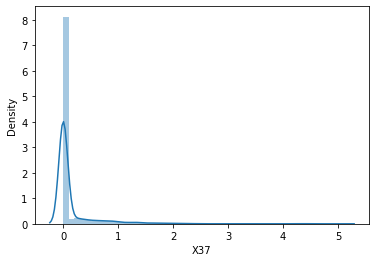

X38
27.8600658888176


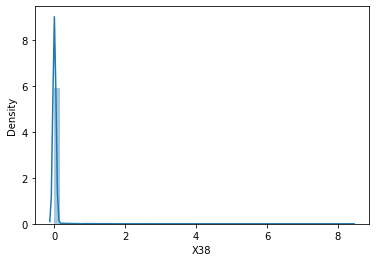

X39
11.102224552828773


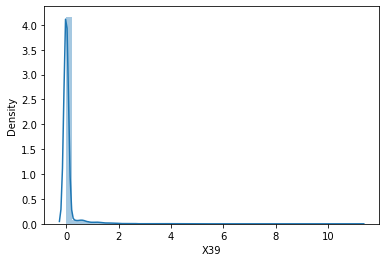

X40
8.96066942213167


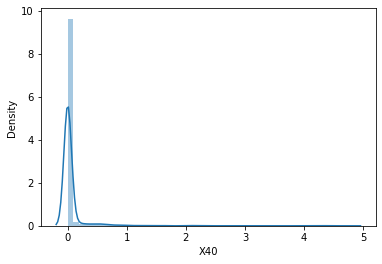

X41
11.823523328560213


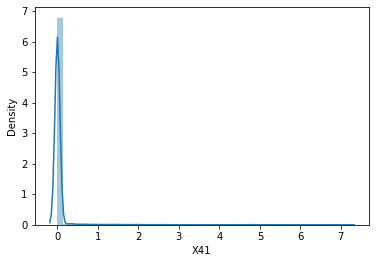

X42
9.129465699867811


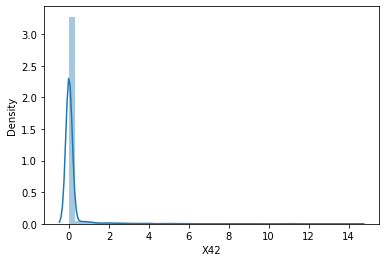

X43
7.421950235511137


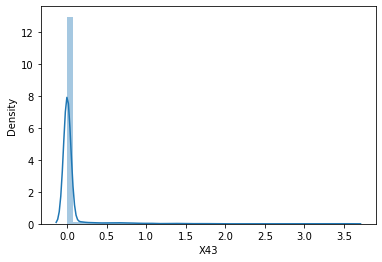

X44
18.22094600001643


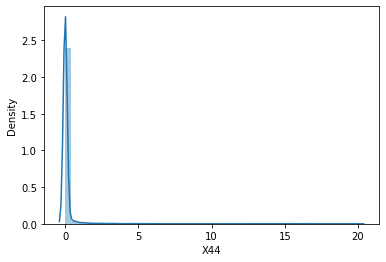

X45
8.742789808335633


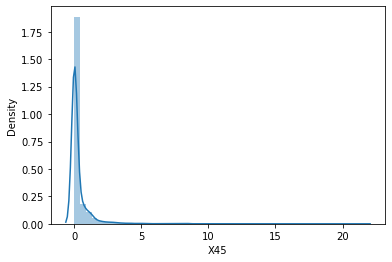

X46
10.248590667005297


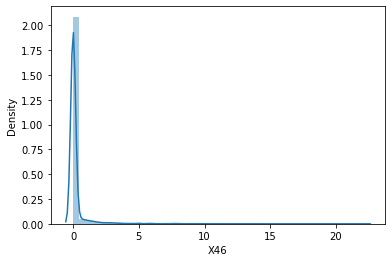

X47
18.386306601510807


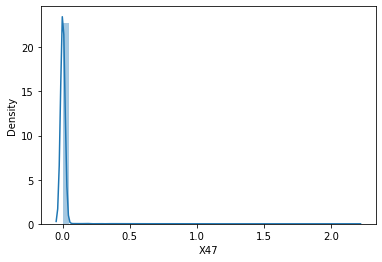

X48
18.641456151807322


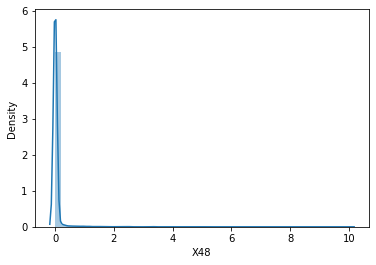

X49
13.849718354760512


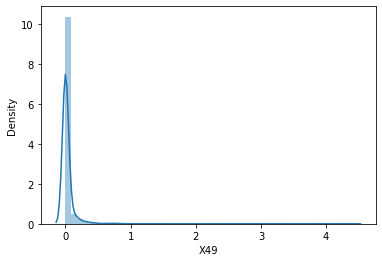

X50
14.512404772427457


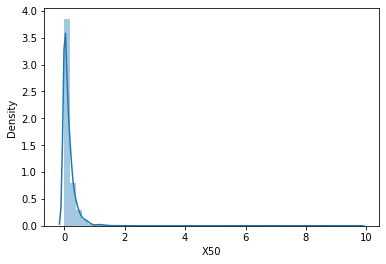

X51
15.345807979784174


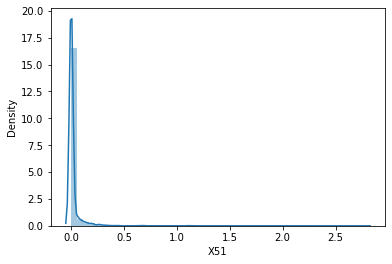

X52
18.350356780424143


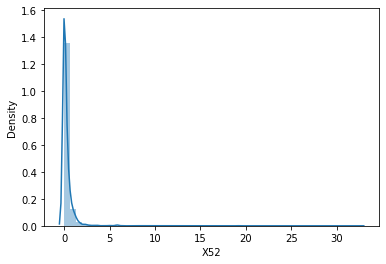

X53
10.842727436841432


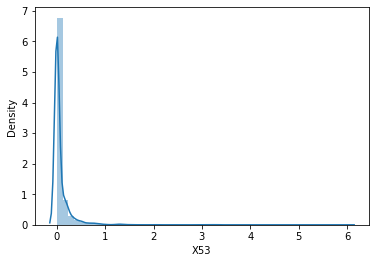

X54
31.534448041019424


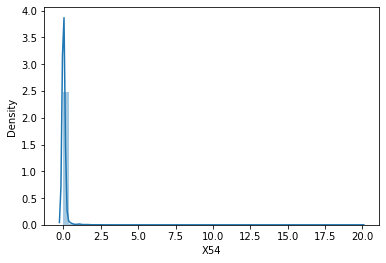

X55
24.58618675973521


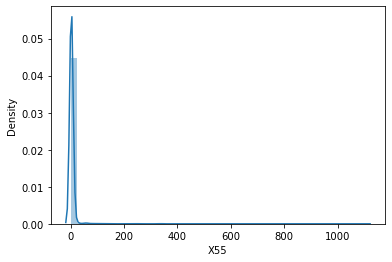

X56
31.310506364341837


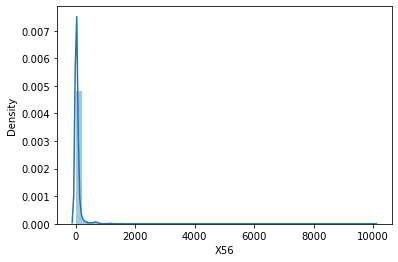

X57
6.625356662755613


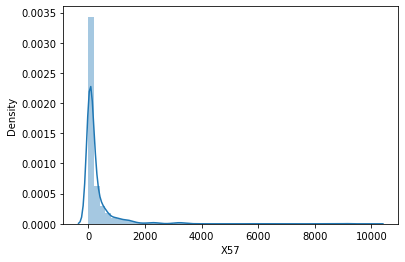

Y
0.41720304862820495


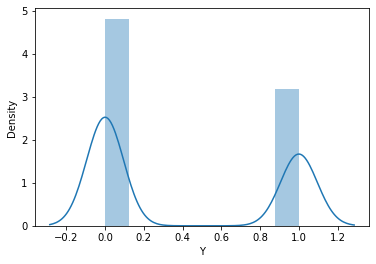

In [599]:
for col in df_train:
    print(col)
    print(skew(df_train[col]))
    plt.figure()
    sns.distplot(df_train[col])
    plt.show()

X1
6.2470817514438854


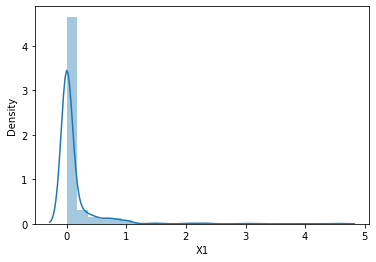

X2
14.690626448707011


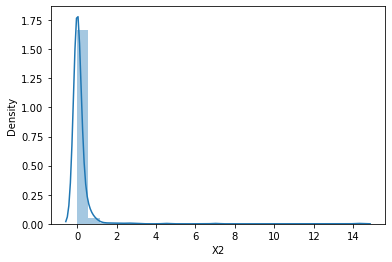

X3
3.4993386135613855


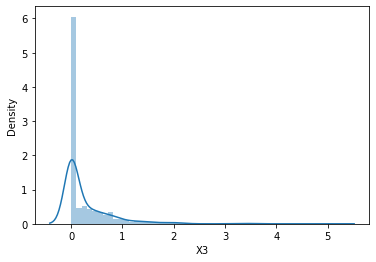

X4
20.12739952567709


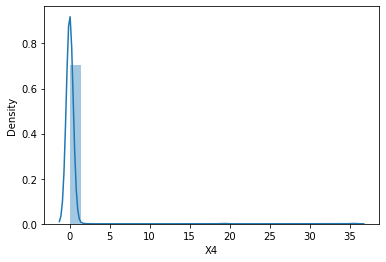

X5
5.949581182339787


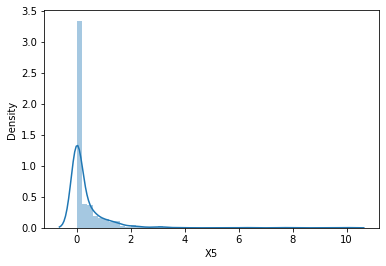

X6
9.299345496423188


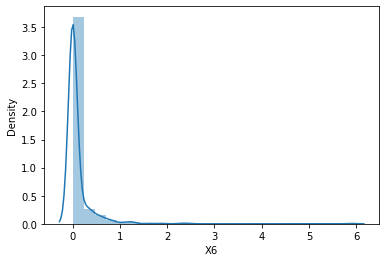

X7
5.658910952735055


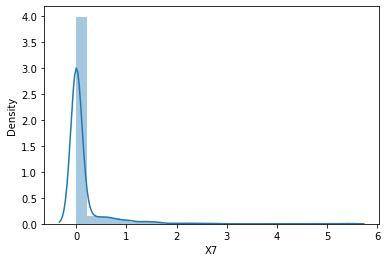

X8
7.270707591783251


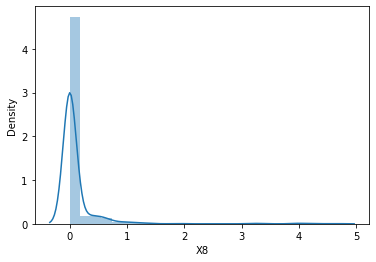

X9
8.841308295706073


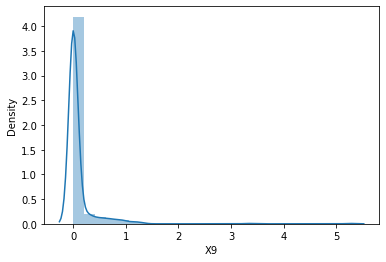

X10
3.555554932286413


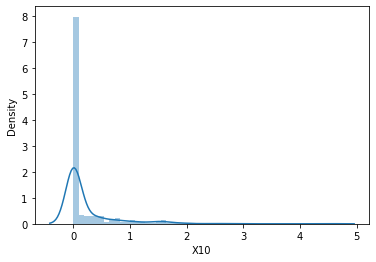

X11
5.434977031882103


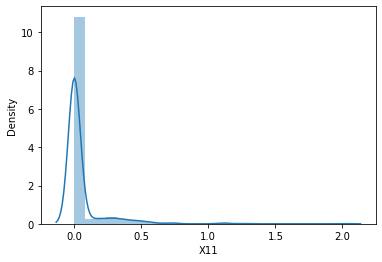

X12
2.752837869159255


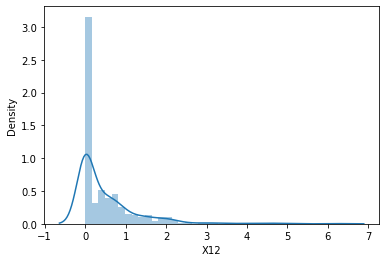

X13
4.551139251719974


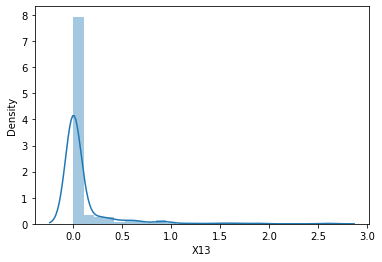

X14
15.29870232034918


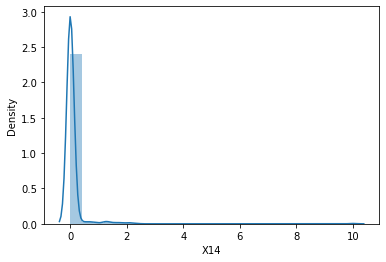

X15
6.467036613097359


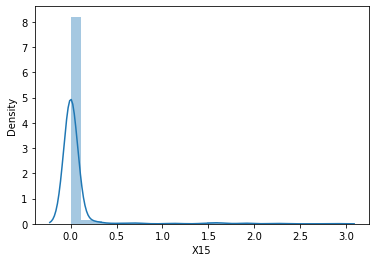

X16
9.947000564885121


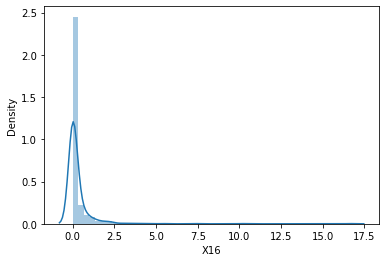

X17
5.639785563880737


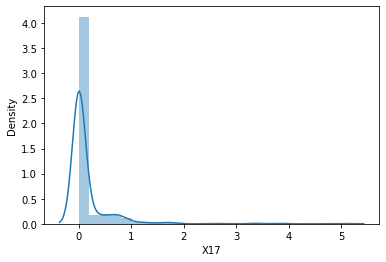

X18
7.5845065001783425


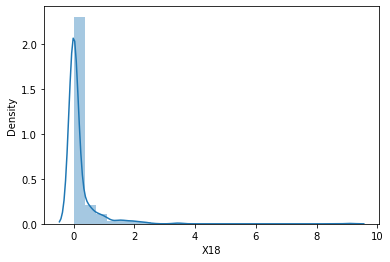

X19
1.5157682700821073


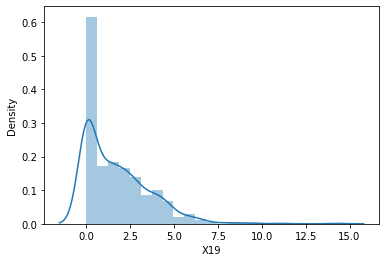

X20
17.563838476972865


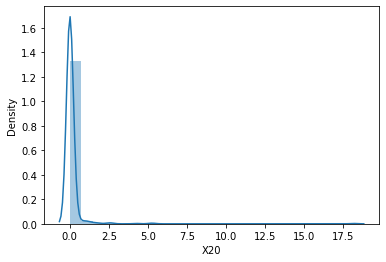

X21
2.157402618231381


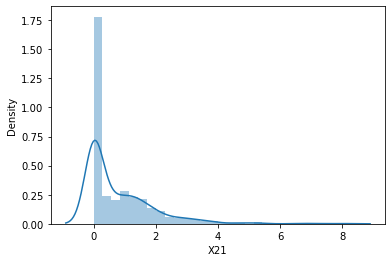

X22
8.01457509667875


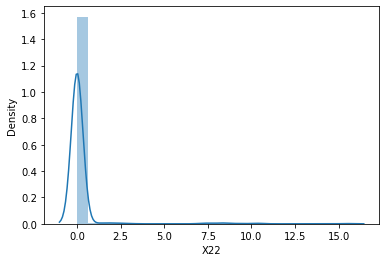

X23
5.4701614075591305


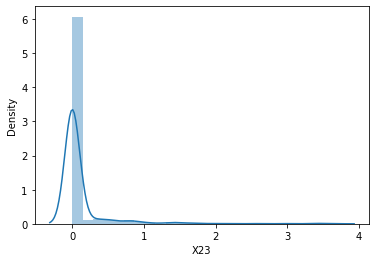

X24
14.112955929423295


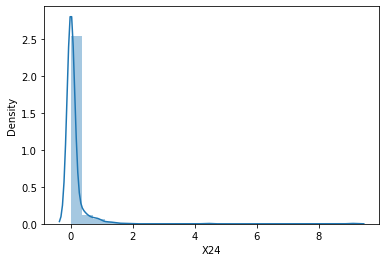

X25
4.196243169170478


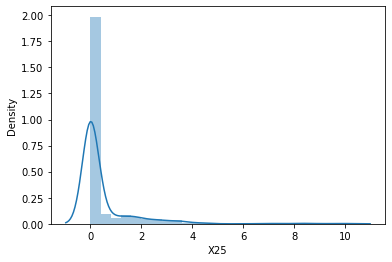

X26
5.382743860463778


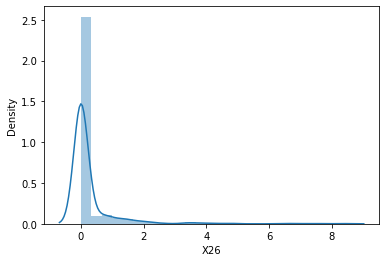

X27
8.701433705269542


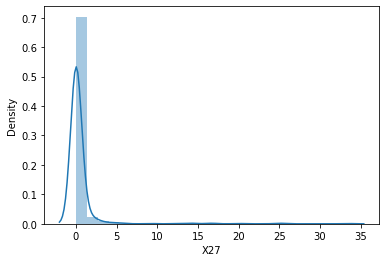

X28
5.240335152744463


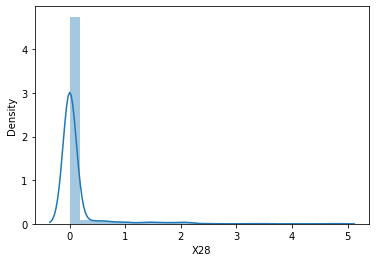

X29
9.07722086265399


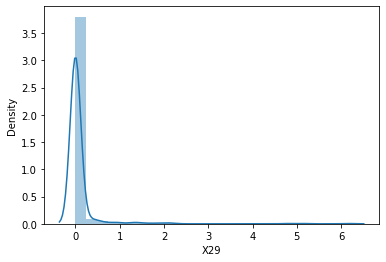

X30
7.031947266369088


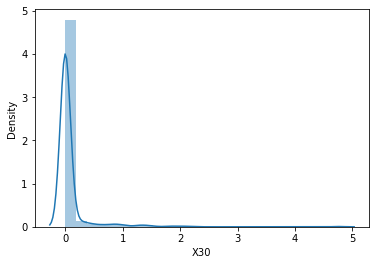

X31
10.557213687956922


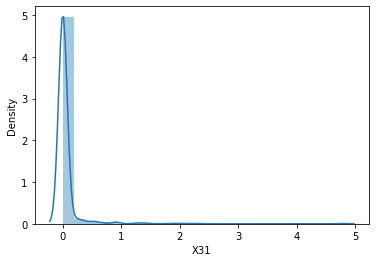

X32
11.43399571151454


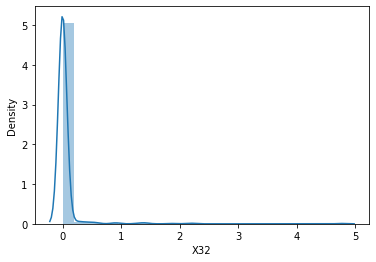

X33
8.607364587775264


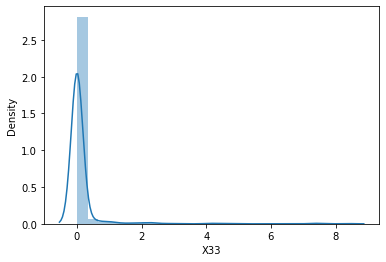

X34
11.419875095360187


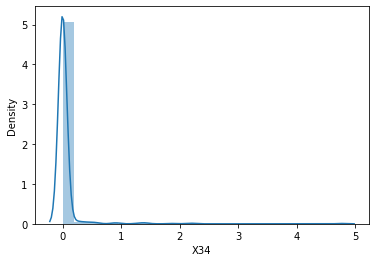

X35
7.19873237022469


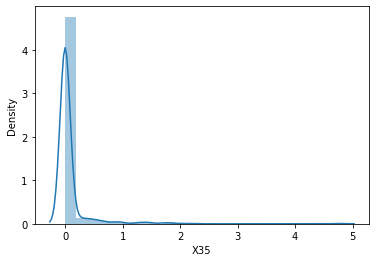

X36
5.770669256557954


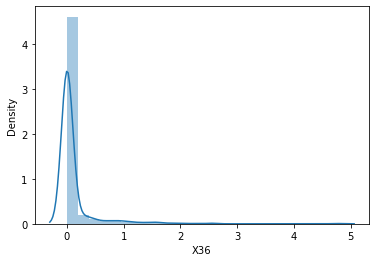

X37
6.804728797239199


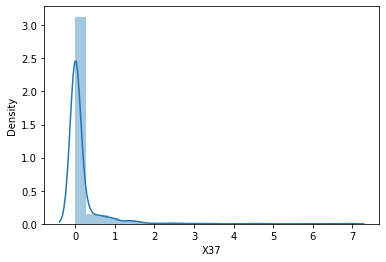

X38
24.630127621107327


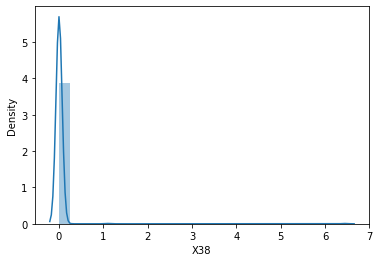

X39
13.473227931680025


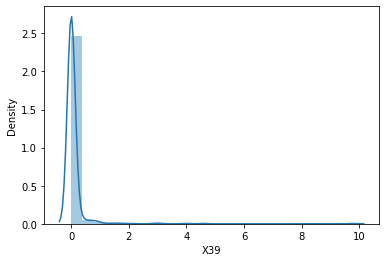

X40
10.548789243575937


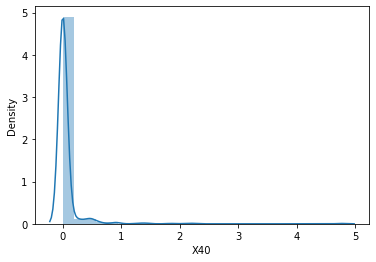

X41
8.606432672617572


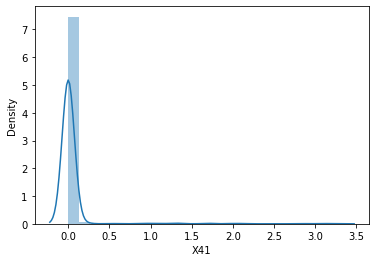

X42
7.811197965195858


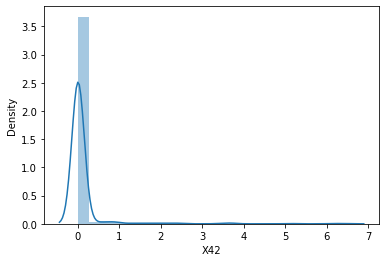

X43
6.425377227839434


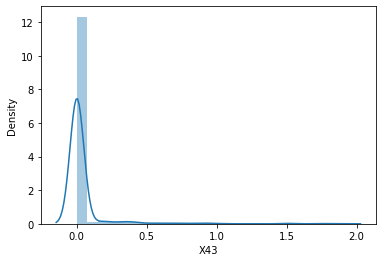

X44
9.633883528898917


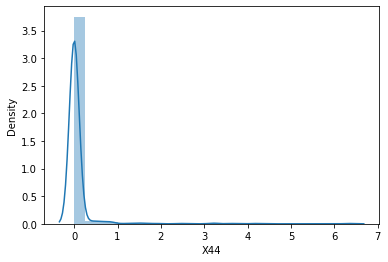

X45
5.685965965755747


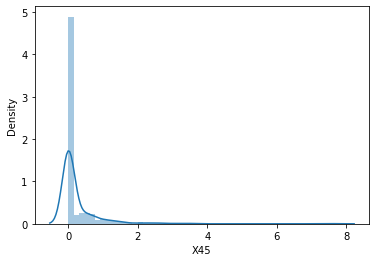

X46
6.914336639132188


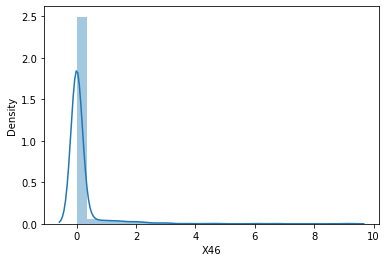

X47
19.503443592447958


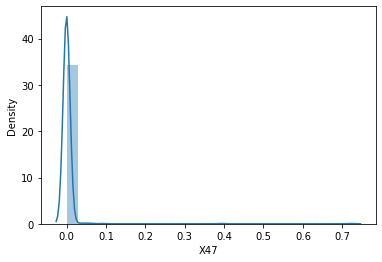

X48
10.309430347641396


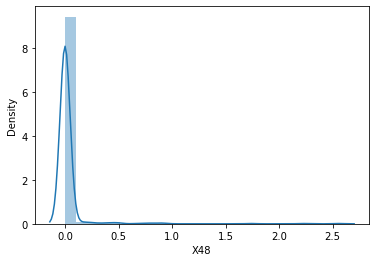

X49
11.440144855912902


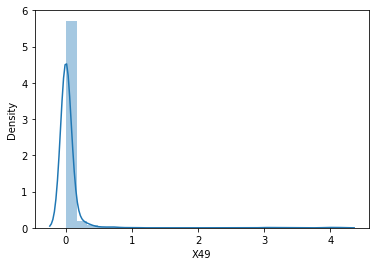

X50
4.6379467125654825


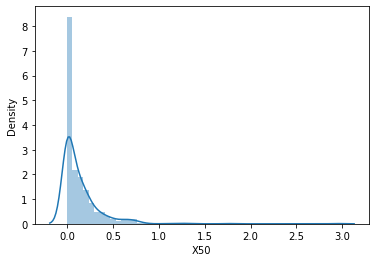

X51
15.976951303848642


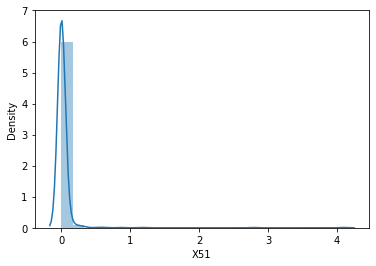

X52
4.833767940224429


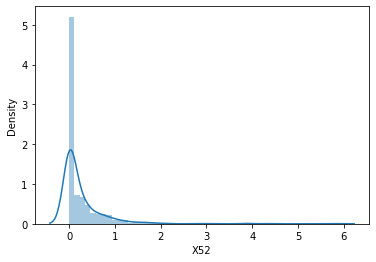

X53
4.204091029286976


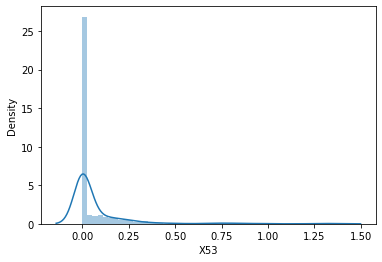

X54
10.065862692585638


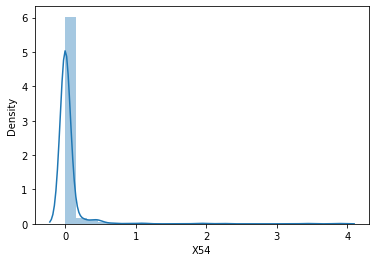

X55
15.02172969515402


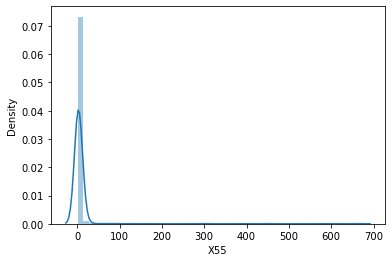

X56
5.995551668796412


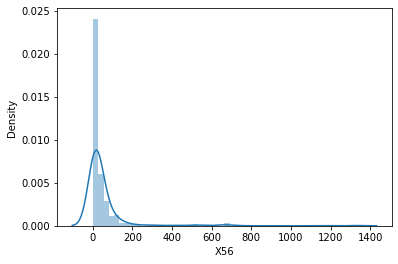

X57
13.762880436550578


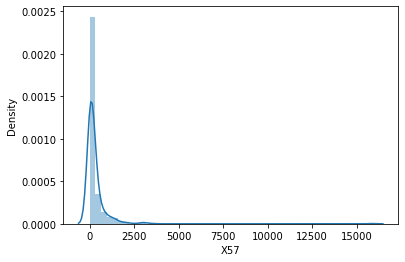

In [600]:
for col in df_test:
    print(col)
    print(skew(df_test[col]))
    plt.figure()
    sns.distplot(df_test[col])
    plt.show()

### DIstribution of datapoints by using BoxPlot

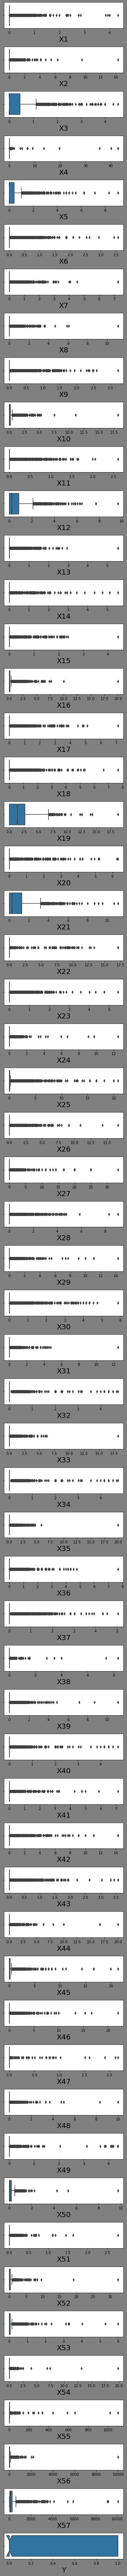

In [601]:
#let see how data is distribute in every column

plt.figure(figsize=(5,99),facecolor="grey")
plotnumber=1

for column in df_train:
    if plotnumber<=58:
        ax=plt.subplot(58,1,plotnumber)
        sns.boxplot(df_train[column], notch=True,orient="v")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no variable which have ctaegorical valuee all are contenuous in nature.

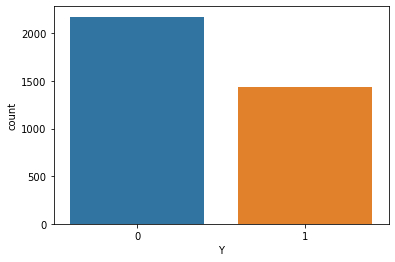

In [602]:
#will check each class frequency by using count plot
sns.countplot(x='Y',data=df_train)
plt.show()

In [603]:
#Split dependant and independant variable.

y=df_train['Y']
x=df_train.drop(columns = 'Y')

print("total 0's =>",y.value_counts()[0])
print("total 1's =>",y.value_counts()[1])

y.value_counts()[0] - y.value_counts()[1]

total 0's => 2176
total 1's => 1438


738

# Observation :

In Independant variable  almost all columns are occupied with skewness.

Regression Algorithms like linear,logistic are consider the distribution of independant variable is in 
guassian Distributin form. But the Algorithms like Neural Network, SVM, Tree based are not make any assumption over
distribution of independant variable.On this assumption we build our  model by using boath regression and trebased concepts and compare there result.

#### Handelling miss balance in dataset

In [604]:
from sklearn.utils import resample

In [605]:
X = df_train[df_train.Y==0]
Y = df_train[df_train.Y==1]

In [606]:
print("Total 0's ",X.shape)
print("Total 1's ",Y.shape)

Total 0's  (2176, 58)
Total 1's  (1438, 58)


In [607]:
#split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [608]:
#conacat train data features add dependant variables
x_train=pd.concat([x_train,y_train],axis=1)

In [609]:
x_train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [610]:
#shape after taking data for training 
Y_0=x_train[x_train.Y==0]
Y_1=x_train[x_train.Y==1]

print(Y_0.shape)
print(Y_1.shape)

(1630, 58)
(1080, 58)


In [611]:
#upsampling
Y_downsampling = resample(Y_0,replace = True,n_samples = len(Y_1),random_state = 20)

In [612]:
Y_downsampling.shape

(1080, 58)

In [613]:
#concat minority and downsampled majority

downsampled = pd.concat([Y_1,Y_downsampling])
downsampled.shape

(2160, 58)

In [614]:
#shape of dta set after up sampling.
print(downsampled[downsampled.Y==0].shape)
print(downsampled[downsampled.Y==1].shape)

(1080, 58)
(1080, 58)


In [634]:
y=downsampled['Y']
x=downsampled.drop(columns = 'Y')

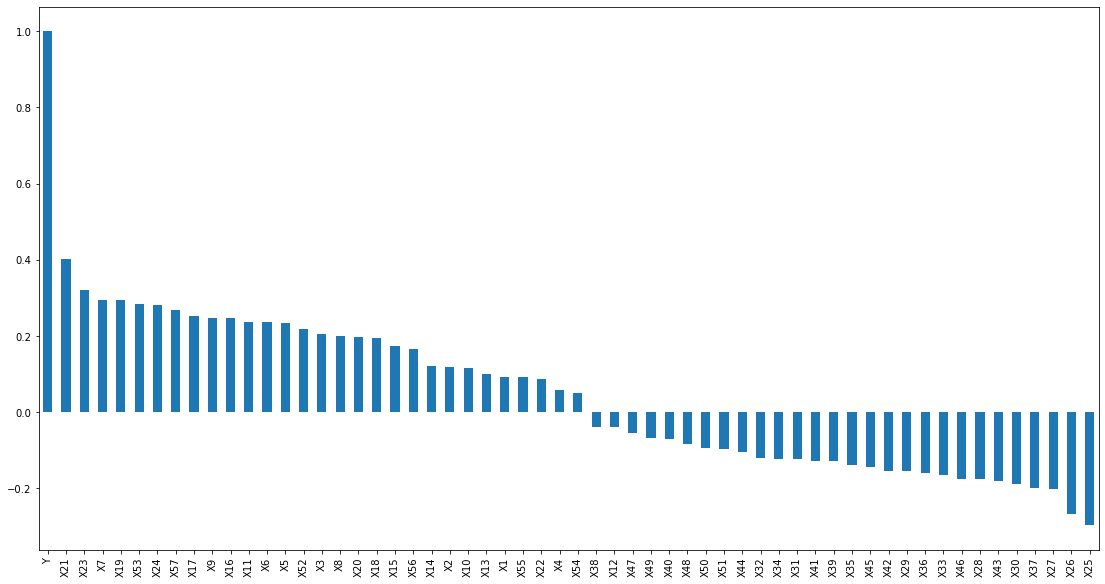

In [616]:
fig, ax = plt.subplots(figsize=(19,10))
downsampled.corr()["Y"].sort_values(ascending=False).plot(kind="bar", ax=ax)

Now we have balancd the dataset with respect to 'Y' variable

### Removing correlated features

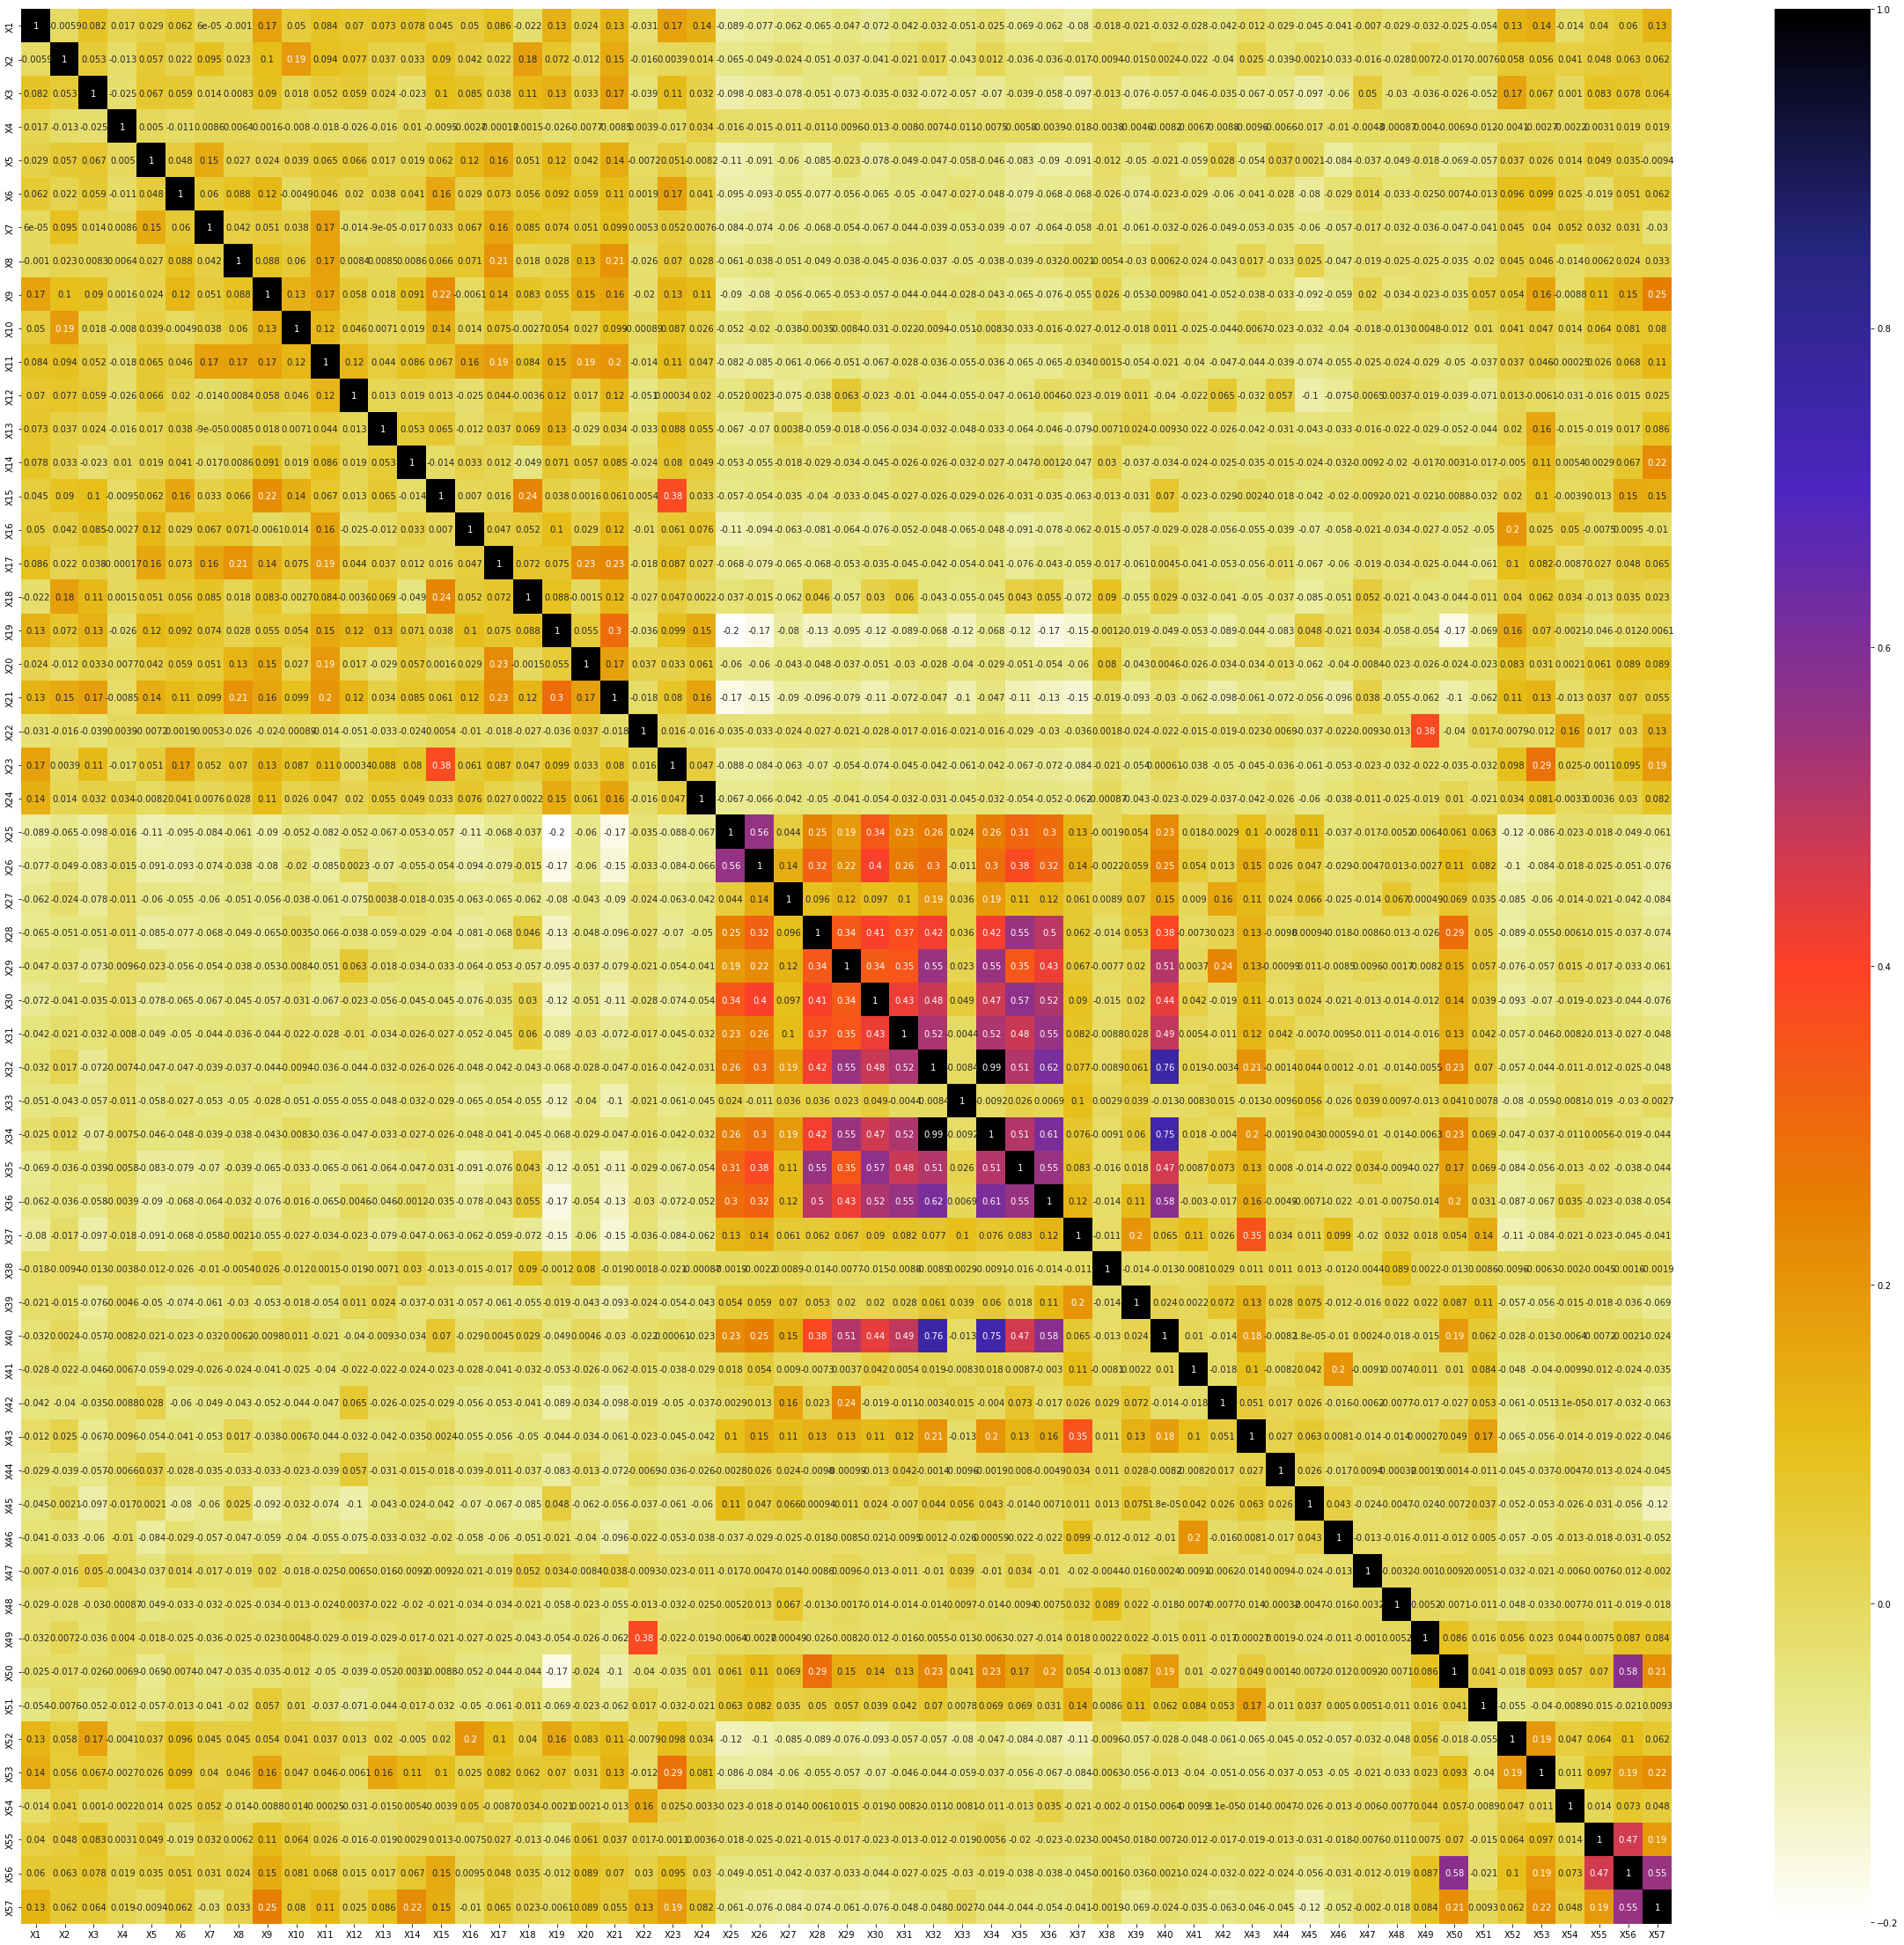

In [527]:
#Check the collenarity In-between the Independant variables
#Using  Person Correlation
plt.figure(figsize=(42,40))
cor=x.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [635]:
#with help of following function we can select highly correlated features
#it will remove the feature that is highly correlated with any other feature

def correlation(df,threshold):
    col_corr=set() #set of all correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#abs will convert negitively high correlation feature into positive
                col_name=corr_matrix.columns[i]#getting name of column
                col_corr.add(col_name)
    return col_corr

In [636]:
#NUmber of Features which have correlation >70%
corr_feature = correlation(x,0.70)
len(set(corr_feature))

2

In [637]:
#Features which have correlation >70%
corr_feature

{'X34', 'X40'}

In [638]:
x=x.drop(columns = corr_feature,axis=1)
print("After removing correlated feature",x.shape)

After removing correlated feature (2160, 55)


# Note :

Now  from available Independant  feaures we'll find the most effective features for Y by using mutual information gain.

In [639]:
#Train test split To avoid overfitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [640]:
#Determining the mutual information
mutual_info = mutual_info_classif(x,y,discrete_features=[0,1],)
mutual_info

array([0.07808424, 0.10053408, 0.08431647, 0.        , 0.11188735,
       0.0723995 , 0.14659145, 0.06954392, 0.06190527, 0.07569996,
       0.10426163, 0.06005111, 0.04542453, 0.03571994, 0.03407603,
       0.14020475, 0.09171934, 0.04507191, 0.13403601, 0.07422206,
       0.17482493, 0.        , 0.1250152 , 0.11957372, 0.11781636,
       0.08734829, 0.11230889, 0.03776674, 0.03405683, 0.03085222,
       0.02602038, 0.0339849 , 0.03471395, 0.04861836, 0.01152317,
       0.04574685, 0.00687148, 0.01685213, 0.02587216, 0.00586837,
       0.0244376 , 0.0336325 , 0.04819278, 0.06229589, 0.        ,
       0.01151823, 0.01955803, 0.07459119, 0.0075009 , 0.20810858,
       0.18924978, 0.04017231, 0.18411807, 0.19339671, 0.15054146])

In [641]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
Best_features = mutual_info.sort_values(ascending=False)
Best_features

X52    0.208109
X56    0.193397
X53    0.189250
X55    0.184118
X21    0.174825
X57    0.150541
X7     0.146591
X16    0.140205
X19    0.134036
X23    0.125015
X24    0.119574
X25    0.117816
X27    0.112309
X5     0.111887
X11    0.104262
X2     0.100534
X17    0.091719
X26    0.087348
X3     0.084316
X1     0.078084
X10    0.075700
X50    0.074591
X20    0.074222
X6     0.072399
X8     0.069544
X46    0.062296
X9     0.061905
X12    0.060051
X35    0.048618
X45    0.048193
X37    0.045747
X13    0.045425
X18    0.045072
X54    0.040172
X28    0.037767
X14    0.035720
X33    0.034714
X15    0.034076
X29    0.034057
X32    0.033985
X44    0.033632
X30    0.030852
X31    0.026020
X41    0.025872
X43    0.024438
X49    0.019558
X39    0.016852
X36    0.011523
X48    0.011518
X51    0.007501
X38    0.006871
X42    0.005868
X22    0.000000
X47    0.000000
X4     0.000000
dtype: float64

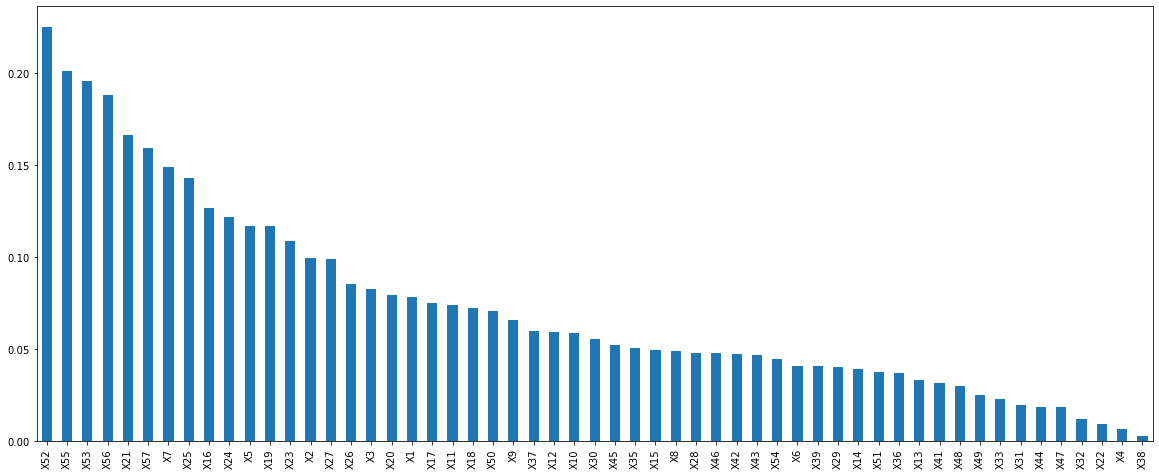

In [551]:
#Plot the ordered mutual_info values per feature
Best_features.sort_values(ascending=False).plot.bar(figsize=(20,8))

## Building model with first best  features.

In [642]:
Best_features = pd.DataFrame(Best_features)
x = x[Best_features[:30].index] #we are utilizing first 15 Best features
# df_train = pd.concat([x,pd.DataFrame(y)],axis=1)

In [643]:
x

,X52,X56,X53,X55,X21,X57,X7,X16,X19,X23,X24,X25,X27,X5,X11,X2,X17,X26,X3,X1,X10,X50,X20,X6,X8,X46,X9,X12,X35,X45
2949,0.288,28.0,0.173,3.065,2.28,141.0,0.65,0.0,2.61,0.65,0.00,0.00,0.00,0.98,0.0,0.0,0.65,0.00,0.32,0.32,0.32,0.000,0.00,0.32,0.00,0.0,0.00,0.98,0.00,0.00
1068,0.165,41.0,0.165,6.266,2.72,94.0,0.00,0.9,3.63,0.00,0.00,0.00,0.00,0.00,0.0,0.9,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.90
538,0.095,24.0,0.000,2.717,1.35,318.0,0.20,0.1,4.17,0.52,0.41,0.00,0.00,0.00,0.0,0.0,0.20,0.00,0.10,0.20,0.00,0.057,0.00,0.10,0.00,0.0,0.00,0.72,0.00,0.00
390,1.562,22.0,0.360,2.638,2.41,124.0,0.00,0.8,1.61,0.80,0.00,0.00,0.00,1.61,0.0,0.0,0.80,0.00,0.80,0.80,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2465,0.421,46.0,0.000,6.275,2.36,182.0,1.18,0.0,4.14,0.00,0.00,0.00,0.00,0.00,0.0,0.0,2.95,0.00,0.00,0.59,1.18,0.000,2.36,0.00,0.59,0.0,0.59,1.18,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.000,33.0,0.000,3.989,0.00,738.0,0.00,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.760,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1222,0.000,10.0,0.000,2.565,0.00,59.0,0.00,0.0,0.00,0.00,0.00,4.41,0.00,0.00,0.0,0.0,0.00,4.41,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,1.47,0.00
2864,0.000,3.0,0.000,1.363,0.00,15.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.77
313,0.000,6.0,0.000,1.210,0.00,69.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.062,0.00,0.00,0.00,0.0,0.00,0.86,0.00,0.00


In [644]:
#Transformed dataset Because Logistic regression assume that the data points are normally distributed

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1620, 30)
(540, 30)
(1620,)
(540,)


### Transformaton

In [645]:
#Transform the first valuable 30 features of train dataset
pt = PowerTransformer()
x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.transform(x_test)

In [646]:
lr=LogisticRegression(n_jobs=1,verbose=1)
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)
print(accuracy_score(y_test,y_pred)*100)

90.37037037037037


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [648]:
Train_accurecy = accuracy_score(y_train,lr.predict(x_train_transformed))
Test_accurecy = accuracy_score(y_test,y_pred)
print("Train_accurecy : ",Train_accurecy)
print("Test_accurecy : ",Test_accurecy)
print("\n\n Classification Report\n")


#Classification report
print(classification_report(y_test,y_pred,digits=2))

Train_accurecy :  0.9475308641975309
Test_accurecy :  0.9037037037037037


 Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       260
           1       0.92      0.89      0.91       280

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.90      0.90      0.90       540



In [649]:
#cross val score

pt = PowerTransformer()
x_transformed = pt.fit_transform(x)

#Dual = False(default) ---> n_samples > n_features.
np.mean(cross_val_score(lr,x_transformed,y,cv=15,scoring='accuracy'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.9356481481481481

## GRID SEARCH CV

In [650]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet'],'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr=LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train_transformed,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [651]:
print(clf.best_params_)

{'C': 0.3, 'penalty': 'l2', 'solver': 'newton-cg'}


In [652]:
lr=LogisticRegression(verbose=1,C= 0.3, penalty= 'l2', solver='newton-cg')
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)
print(accuracy_score(y_test,y_pred)*100)

90.55555555555556


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [653]:
#cross val score

pt = PowerTransformer()
x_transformed = pt.fit_transform(x)

#Dual = False(default) ---> n_samples > n_features.
np.mean(cross_val_score(lr,x_transformed,y,cv=15,scoring='accuracy'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.936574074074074

[[240  20]
 [ 31 249]]


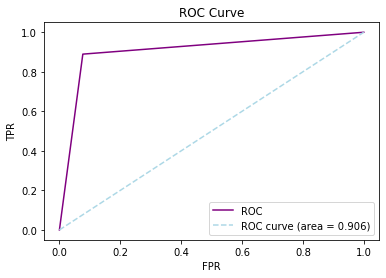

In [654]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

#Area Under Curve
auc = roc_auc_score(y_test,y_pred)
auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

#Plot Graph
plt.plot(fpr,tpr,color='purple',label='ROC')
plt.plot([0,1],[0,1],color='lightblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Linear Regression almost 91% area is covered by Curve

Model accurecy which we are getting 90% which shows that the model is performing well.
After making data balanced by using downsampling for good results we try with Randomforest. 

### PREDICTING TEST DATA BY USING LR

In [655]:
df_test = df_test[x.columns]

In [656]:
df_test

,X52,X56,X53,X55,X21,X57,X7,X16,X19,X23,X24,X25,X27,X5,X11,X2,X17,X26,X3,X1,X10,X50,X20,X6,X8,X46,X9,X12,X35,X45
0,0.105,47.0,0.000,2.342,0.00,89.0,0.00,0.00,2.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,0.00,0.000,0.0,0.00,0.00,1.41,0.00,0.00,0.00,1.41
1,0.776,168.0,0.129,10.375,1.69,249.0,0.84,0.00,2.54,0.00,0.84,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.388,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.325,193.0,0.756,5.891,1.46,3040.0,0.05,0.25,3.22,1.05,0.36,0.00,0.00,0.05,0.25,0.30,0.43,0.00,0.46,0.46,0.74,0.065,0.0,0.12,0.28,0.00,0.43,0.97,0.00,0.02
3,0.490,669.0,0.158,8.550,0.70,1351.0,0.50,0.10,1.31,0.60,0.10,0.00,0.00,0.80,0.30,0.20,0.00,0.00,1.01,0.10,0.10,0.110,0.2,0.80,0.00,0.10,0.80,0.70,0.00,0.10
4,0.729,32.0,0.121,7.781,1.45,249.0,0.72,0.00,1.45,0.00,0.72,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.364,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,0.043,17.0,0.000,2.111,0.00,190.0,0.00,0.25,0.25,0.00,0.00,2.06,0.25,0.00,0.00,0.00,0.00,1.03,0.00,0.25,0.00,0.473,0.0,0.00,0.00,0.00,0.25,0.00,0.25,0.25
687,0.375,7.0,0.000,2.250,0.00,36.0,0.00,0.00,0.00,0.00,0.00,0.00,5.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2.56
688,0.000,5.0,0.000,2.333,0.00,7.0,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
689,0.057,65.0,0.022,1.875,0.40,542.0,0.00,0.00,0.65,0.00,0.00,1.38,0.00,0.48,0.00,0.08,0.81,0.00,0.57,0.08,0.00,0.034,0.0,0.00,0.08,0.00,0.00,0.81,0.08,0.08


In [657]:
pt = PowerTransformer()
df_test_transformed = pt.fit_transform(df_test)

In [658]:
test_result = pd.DataFrame(lr.predict(df_test_transformed))

In [659]:
test_result

,0
0,0
1,1
2,1
3,1
4,1
...,...
656,0
657,0
658,0
659,0


# Random Forest

In [660]:
yy=downsampled['Y']
xx=downsampled.drop(columns = 'Y')

In [661]:
xx=xx[x.columns]

In [662]:
xx

,X52,X56,X53,X55,X21,X57,X7,X16,X19,X23,X24,X25,X27,X5,X11,X2,X17,X26,X3,X1,X10,X50,X20,X6,X8,X46,X9,X12,X35,X45
2949,0.288,28.0,0.173,3.065,2.28,141.0,0.65,0.0,2.61,0.65,0.00,0.00,0.00,0.98,0.0,0.0,0.65,0.00,0.32,0.32,0.32,0.000,0.00,0.32,0.00,0.0,0.00,0.98,0.00,0.00
1068,0.165,41.0,0.165,6.266,2.72,94.0,0.00,0.9,3.63,0.00,0.00,0.00,0.00,0.00,0.0,0.9,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.90
538,0.095,24.0,0.000,2.717,1.35,318.0,0.20,0.1,4.17,0.52,0.41,0.00,0.00,0.00,0.0,0.0,0.20,0.00,0.10,0.20,0.00,0.057,0.00,0.10,0.00,0.0,0.00,0.72,0.00,0.00
390,1.562,22.0,0.360,2.638,2.41,124.0,0.00,0.8,1.61,0.80,0.00,0.00,0.00,1.61,0.0,0.0,0.80,0.00,0.80,0.80,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2465,0.421,46.0,0.000,6.275,2.36,182.0,1.18,0.0,4.14,0.00,0.00,0.00,0.00,0.00,0.0,0.0,2.95,0.00,0.00,0.59,1.18,0.000,2.36,0.00,0.59,0.0,0.59,1.18,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.000,33.0,0.000,3.989,0.00,738.0,0.00,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.760,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1222,0.000,10.0,0.000,2.565,0.00,59.0,0.00,0.0,0.00,0.00,0.00,4.41,0.00,0.00,0.0,0.0,0.00,4.41,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,1.47,0.00
2864,0.000,3.0,0.000,1.363,0.00,15.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.77
313,0.000,6.0,0.000,1.210,0.00,69.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.062,0.00,0.00,0.00,0.0,0.00,0.86,0.00,0.00


In [663]:
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size=0.25,random_state=0)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print("\n\n")

Train_accurecy = accuracy_score(y_train,rf.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print("Train_accurecy : ",Train_accurecy)
print("Test_accurecy : ",Test_accurecy)
print("\n\n Classification Report\n")


#Classification report
print(classification_report(y_test,y_pred,digits=2))

print("\n\n")

#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

print("\n\n")

np.mean(cross_val_score(rf,x_transformed,y,cv=15,scoring='accuracy'))

92.22222222222223



Train_accurecy :  0.9993827160493827
Test_accurecy :  0.9222222222222223


 Classification Report

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       260
           1       0.94      0.90      0.92       280

    accuracy                           0.92       540
   macro avg       0.92      0.92      0.92       540
weighted avg       0.92      0.92      0.92       540




[[245  15]
 [ 27 253]]





0.950462962962963

In [665]:
parameters = {'n_estimators':[i for i in range(100,1000,100)],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3],'min_samples_split':[1,2,3]}
rf=RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [666]:
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}


### Random Forest after hyper parameter tuning

In [667]:
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size=0.25,random_state=0)
rf=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=3,n_estimators=500)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print("\n\n")

Train_accurecy = accuracy_score(y_train,rf.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print("Train_accurecy : ",Train_accurecy)
print("Test_accurecy : ",Test_accurecy)
print("\n\n Classification Report\n")


#Classification report
print(classification_report(y_test,y_pred,digits=2))

print("\n\n")

#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

print("\n\n")

np.mean(cross_val_score(rf,x_transformed,y,cv=15,scoring='accuracy'))

92.4074074074074



Train_accurecy :  0.9987654320987654
Test_accurecy :  0.924074074074074


 Classification Report

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       260
           1       0.95      0.90      0.93       280

    accuracy                           0.92       540
   macro avg       0.92      0.92      0.92       540
weighted avg       0.93      0.92      0.92       540




[[246  14]
 [ 27 253]]





0.9541666666666667

[[246  14]
 [ 27 253]]


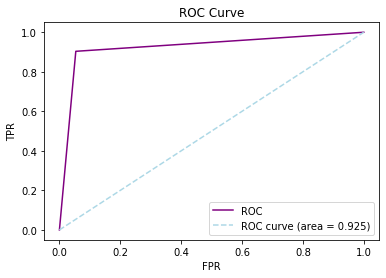

In [668]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

#Area Under Curve
auc = roc_auc_score(y_test,y_pred)
auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

#Plot Graph
plt.plot(fpr,tpr,color='purple',label='ROC')
plt.plot([0,1],[0,1],color='lightblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Linear Regression almost 92.5% area is covered by Curve

Model accurecy which we are getting 92% which shows that the model is performing well.
After making data balanced by using downsampling for good results we try with Randomforest. 

# PREDICTING TEST DATA bY USING RF

In [669]:
df_test = df_test[x.columns]

In [670]:
pt = PowerTransformer()
df_test_transformed = pt.fit_transform(df_test)

test_result = pd.DataFrame(rf.predict(df_test_transformed))

test_result

,0
0,0
1,1
2,1
3,1
4,1
...,...
656,0
657,0
658,0
659,0


# We are finalising RandomForest model to predict the Test data.

In [672]:
#Saving the model
import pickle
filename = 'ANONYM.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion :

In [673]:
loaded_model = pickle.load(open('ANONYM.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.924074074074074


In [674]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])

In [675]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539
predicted,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0
original,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0
